<a href="https://colab.research.google.com/github/ShahinGanbar/Wake-Word-Detector/blob/main/wake_word_detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget http://download.tensorflow.org/data/speech_commands_v0.02.tar.gz

--2025-12-24 19:46:37--  http://download.tensorflow.org/data/speech_commands_v0.02.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 142.250.141.207, 142.250.101.207, 142.251.2.207, ...
Connecting to download.tensorflow.org (download.tensorflow.org)|142.250.141.207|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2428923189 (2.3G) [application/gzip]
Saving to: ‘speech_commands_v0.02.tar.gz’

speech_commands_v0. 100%[===================>]   2.26G   215MB/s    in 10s     

2025-12-24 19:46:47 (230 MB/s) - ‘speech_commands_v0.02.tar.gz’ saved [2428923189/2428923189]



In [2]:
!tar -xvf speech_commands_v0.02.tar.gz

Streaming output truncated to the last 5000 lines.
./on/fc3ba625_nohash_0.wav
./on/db9d52d2_nohash_0.wav
./on/72242187_nohash_4.wav
./on/b0f5b16d_nohash_0.wav
./on/d9aa8c90_nohash_1.wav
./on/525eaa62_nohash_0.wav
./on/42e3f068_nohash_0.wav
./on/94d370bf_nohash_4.wav
./on/bf8d5617_nohash_0.wav
./on/e2b7d6d6_nohash_2.wav
./on/89ed36ab_nohash_0.wav
./on/30276d03_nohash_1.wav
./on/364c0853_nohash_0.wav
./on/7cbf645a_nohash_0.wav
./on/c98bbbd3_nohash_2.wav
./on/9a7c1f83_nohash_5.wav
./on/3589bc72_nohash_0.wav
./on/3ae5c04f_nohash_0.wav
./on/adc216c5_nohash_2.wav
./on/c50f55b8_nohash_15.wav
./on/324210dd_nohash_2.wav
./on/c120e80e_nohash_2.wav
./on/69086eb0_nohash_0.wav
./on/dce05676_nohash_1.wav
./on/435695e3_nohash_1.wav
./on/179a61b7_nohash_1.wav
./on/f5341341_nohash_0.wav
./on/91b03183_nohash_0.wav
./on/96d8bb6f_nohash_2.wav
./on/6a1908f8_nohash_0.wav
./on/6ace4fe1_nohash_1.wav
./on/84d1e469_nohash_1.wav
./on/ba676390_nohash_0.wav
./on/1dc86f91_nohash_4.wav
./on/3a929277_nohash_2.wav
./o

In [3]:
!pip install librosa numpy torch torchaudio matplotlib


In [4]:
import librosa
import numpy as np

def wav_to_mel(path, sr=16000, n_mels=64):
    audio, sr = librosa.load(path, sr=sr)
    # Ensure all audio is 1 second for training consistency
    if len(audio) > sr: audio = audio[:sr]
    else: audio = np.pad(audio, (0, max(0, sr - len(audio))))

    mel = librosa.feature.melspectrogram(y=audio, sr=sr, n_mels=n_mels, n_fft=1024, hop_length=512)
    mel_db = librosa.power_to_db(mel, ref=1.0) # Use fixed ref

    # Standardize (StandardScaler style)
    mel_db = (mel_db - (-40.0)) / 20.0 # Example: scaling to a manageable range
    return mel_db


In [5]:
import os
import torch
from torch.utils.data import Dataset

class WakeWordDataset(Dataset):
    def __init__(self, root_dir, wake_word="marvin"):
        self.samples = []
        self.marvins = []
        self.others = []

        for folder in os.listdir(root_dir):
            okay = 0
            if folder == wake_word:
                okay = 1
            folder_path = os.path.join(root_dir, folder)
            if not os.path.isdir(folder_path):
                continue

            label = 1 if folder == wake_word else 0
            i = 0
            for file in os.listdir(folder_path):
                if file.endswith(".wav"):
                    i+=1
                    if okay == 1:
                       self.marvins.append(os.path.join(folder_path, file))
                    elif i <= 2100:
                        self.others.append(os.path.join(folder_path, file))
                    self.samples.append(
                        (os.path.join(folder_path, file), label)
                    )

    def len(self):
        return len(self.samples)

    def get_item(self, idx):
        path, label = self.samples[idx]
        mel = wav_to_mel(path)

        mel = torch.tensor(mel).unsqueeze(0)  # (1, n_mels, time)
        label = torch.tensor(label)

        return mel, label


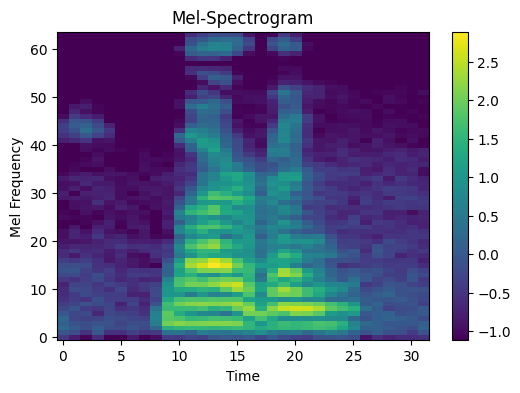

In [6]:
import matplotlib.pyplot as plt

mel = wav_to_mel("marvin/0a7c2a8d_nohash_0.wav")

plt.figure(figsize=(6, 4))
plt.imshow(mel, aspect='auto', origin='lower')
plt.colorbar()
plt.title("Mel-Spectrogram")
plt.xlabel("Time")
plt.ylabel("Mel Frequency")
plt.show()


In [7]:
a = WakeWordDataset("/content/")


In [8]:
a.samples[60617]

('/content/one/21832144_nohash_4.wav', 0)

In [9]:
len(a.samples)

105835

In [10]:
len(a.marvins)


2100

In [11]:
elebele = wav_to_mel(a.samples[60619][0])

In [12]:
len(a.others)

68217

In [13]:
a.others[0]

'/content/off/38d78313_nohash_1.wav'

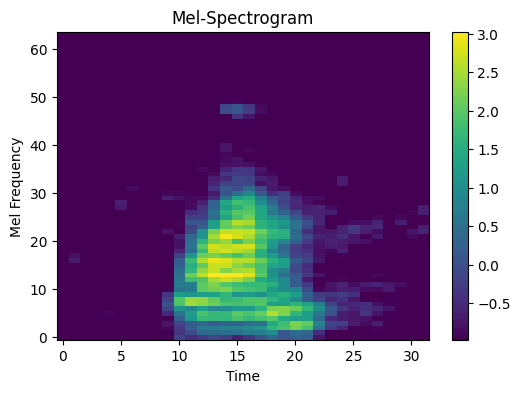

In [14]:
plt.figure(figsize=(6, 4))
plt.imshow(elebele, aspect='auto', origin='lower')
plt.colorbar()
plt.title("Mel-Spectrogram")
plt.xlabel("Time")
plt.ylabel("Mel Frequency")
plt.show()

In [15]:
print(elebele.shape)

(64, 32)


In [16]:
print(type(elebele))

<class 'numpy.ndarray'>


In [17]:
import random as rn

others = rn.sample(a.others, 2100)



In [18]:
print(others)

['/content/four/e900b652_nohash_0.wav', '/content/tree/9307154f_nohash_0.wav', '/content/tree/57b68383_nohash_0.wav', '/content/bird/83957201_nohash_0.wav', '/content/up/ca4eeab0_nohash_0.wav', '/content/stop/e11fbc6e_nohash_2.wav', '/content/three/bbd0bbd0_nohash_0.wav', '/content/eight/87070229_nohash_1.wav', '/content/seven/27c24504_nohash_2.wav', '/content/two/189cbabe_nohash_1.wav', '/content/one/2fee065a_nohash_3.wav', '/content/up/ab9b93e4_nohash_2.wav', '/content/four/f2898d06_nohash_1.wav', '/content/yes/619b5164_nohash_1.wav', '/content/happy/332d33b1_nohash_0.wav', '/content/one/c120e80e_nohash_5.wav', '/content/four/cd7f8c1b_nohash_1.wav', '/content/dog/89f3ab7d_nohash_0.wav', '/content/happy/94403ad3_nohash_0.wav', '/content/cat/352ffbe3_nohash_1.wav', '/content/cat/8056e897_nohash_1.wav', '/content/four/31e686d2_nohash_0.wav', '/content/eight/41777abb_nohash_1.wav', '/content/house/1942abd7_nohash_0.wav', '/content/no/402e2977_nohash_0.wav', '/content/left/3ce4910e_nohash

In [19]:
marvinler = []
basqalari = []

for x in a.marvins:
    mel = wav_to_mel(x)
    marvinler.append(mel)

for x in others:
    mel = wav_to_mel(x)
    basqalari.append(mel)

print(marvinler)
print(basqalari)

Streaming output truncated to the last 5000 lines.
         0.96190655,  1.2359192 ],
       ...,
       [-1.1882244 , -0.73733234, -1.1109577 , ..., -0.48206633,
        -0.670311  , -0.92673093],
       [-1.1882244 , -1.0724065 , -1.1882244 , ..., -0.87866557,
        -1.1722248 , -1.1882244 ],
       [-1.1882244 , -1.1882244 , -1.1882244 , ..., -1.1882244 ,
        -1.1882244 , -1.1882244 ]], dtype=float32), array([[ 0.51442397,  0.583933  ,  0.65610945, ...,  0.4197215 ,
         0.32080364, -0.18501396],
       [ 0.3682333 ,  0.6230444 ,  0.89524806, ...,  0.55604917,
         0.28745764,  0.13076858],
       [-0.12285633,  0.01475945,  0.23464851, ...,  0.5056776 ,
         0.4974208 ,  0.20720883],
       ...,
       [-1.0385958 , -1.0385958 , -1.0385958 , ..., -1.0004385 ,
        -0.993162  , -1.0093527 ],
       [-1.0385958 , -1.0385958 , -1.0385958 , ..., -1.0385958 ,
        -1.0385958 , -1.0385958 ],
       [-1.0385958 , -1.0385958 , -1.0385958 , ..., -1.0385958 ,
        

In [20]:
len(marvinler)

2100

In [21]:
len(basqalari)

2100

In [22]:
st = set()
for x in basqalari:
    st.add(x.shape)
print(st)

{(64, 32)}


In [23]:
stM = set()
for x in marvinler:
    stM.add(x.shape)
print(stM)

{(64, 32)}


In [24]:
import numpy as np

def fix_spectrogram(mel, n_mels=64, time_steps=32):
    """
    Pads or crops a Mel-spectrogram to a fixed number of time steps.

    mel: np.array of shape (n_mels, current_time_steps)
    Returns: np.array of shape (n_mels, time_steps)
    """
    current_steps = mel.shape[1]

    if current_steps < time_steps:
        # pad with zeros on the right
        mel = np.pad(mel, ((0, 0), (0, time_steps - current_steps)), mode='constant')
    else:
        # crop to fixed size
        mel = mel[:, :time_steps]

    return mel


In [25]:
for x in range(len(basqalari)):
    basqalari[x] = fix_spectrogram(basqalari[x])
    marvinler[x] = fix_spectrogram(marvinler[x])



In [26]:
import numpy as np

marvinler = np.array(marvinler)
basqalari = np.array(basqalari)



In [27]:

# Combine the two classes into one dataset
X = np.concatenate([marvinler, basqalari], axis=0)  # (total_samples, n_mels, time_steps)

# Create labels: 1 for marvin, 0 for others
y = np.concatenate([np.ones(len(marvinler)), np.zeros(len(basqalari))], axis=0)

# Shuffle the dataset (recommended)
indices = np.arange(len(X))
np.random.shuffle(indices)
X = X[indices]
y = y[indices]

print("X shape:", X.shape)  # (total_samples, n_mels, time_steps)
print("y shape:", y.shape)  # (total_samples,)


X shape: (4200, 64, 32)
y shape: (4200,)


In [28]:
y


array([1., 1., 0., ..., 1., 0., 0.])

In [29]:
X[0]

array([[ 0.37943763,  0.0771883 , -0.1549881 , ..., -1.6841323 ,
        -1.6841323 , -1.6841323 ],
       [ 0.07230034, -0.32614517, -0.5141121 , ..., -1.6841323 ,
        -1.6841323 , -1.6841323 ],
       [-0.14500466, -0.3248619 , -0.40954417, ..., -1.6841323 ,
        -1.6841323 , -1.6841323 ],
       ...,
       [-1.2205902 , -1.0596387 , -1.4190785 , ..., -1.6841323 ,
        -1.6841323 , -1.6841323 ],
       [-1.253439  , -1.2024196 , -1.4236923 , ..., -1.6841323 ,
        -1.6841323 , -1.6841323 ],
       [-1.3658139 , -1.2435745 , -1.5897839 , ..., -1.6841323 ,
        -1.6841323 , -1.6841323 ]], dtype=float32)

In [30]:
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import TensorDataset, DataLoader
import numpy as np

# 70% train, 10% val, 20% test

# First split train vs temp
X_train, X_temp, y_train, y_temp = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=42,
    shuffle=True,
    stratify=y
)

# Split temp into val and test
X_val, X_test, y_val, y_test = train_test_split(
    X_temp,
    y_temp,
    test_size=2/3,   # 20% test, 10% val overall
    random_state=42,
    shuffle=True,
    stratify=y_temp
)

# Convert to PyTorch tensors
# Add channel dim -> (N, 1, 64, 32)
X_train = torch.tensor(X_train[:, None, :, :], dtype=torch.float32)
X_val   = torch.tensor(X_val[:, None, :, :], dtype=torch.float32)
X_test  = torch.tensor(X_test[:, None, :, :], dtype=torch.float32)

y_train = torch.tensor(y_train, dtype=torch.long)
y_val   = torch.tensor(y_val, dtype=torch.long)
y_test  = torch.tensor(y_test, dtype=torch.long)

# Datasets
train_dataset = TensorDataset(X_train, y_train)
val_dataset   = TensorDataset(X_val, y_val)
test_dataset  = TensorDataset(X_test, y_test)

# Loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader   = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader  = DataLoader(test_dataset, batch_size=32, shuffle=False)

print(
    X_train.shape,
    X_val.shape,
    X_test.shape
)

torch.Size([2940, 1, 64, 32]) torch.Size([420, 1, 64, 32]) torch.Size([840, 1, 64, 32])


In [31]:
for batch_X, batch_y in train_loader:
    print(batch_X.shape)  # (32, 1, 64, 32)
    print(batch_y.shape)  # (32,)
    break


torch.Size([32, 1, 64, 32])
torch.Size([32])


In [32]:
import torch
import torch.nn as nn
import torch.nn.functional as F


In [33]:
class WakeWordCNN(nn.Module):
    def __init__(self):
        super().__init__()

        # Input: (1, 64, 32)
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, padding=1)
        self.pool1 = nn.MaxPool2d(2)        # → (16, 32, 16)

        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
        self.pool2 = nn.MaxPool2d(2)        # → (32, 16, 8)

        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool3 = nn.MaxPool2d(2)        # → (64, 8, 4)

        # Fully connected layers
        self.fc1 = nn.Linear(64 * 8 * 4, 128)
        self.fc2 = nn.Linear(128, 2)        # binary classification

    def forward(self, x):
        x = self.pool1(F.relu(self.conv1(x)))
        x = self.pool2(F.relu(self.conv2(x)))
        x = self.pool3(F.relu(self.conv3(x)))

        x = x.view(x.size(0), -1)  # flatten
        x = F.relu(self.fc1(x))
        x = self.fc2(x)

        return x

In [34]:
device = "cuda" if torch.cuda.is_available() else "cpu"

model = WakeWordCNN().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


In [35]:
epochs = 40

for epoch in range(epochs):
    # Train
    model.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0

    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)

        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        preds = torch.argmax(outputs, dim=1)
        correct_train += (preds == y_batch).sum().item()
        total_train += y_batch.size(0)

    avg_loss = running_loss / len(train_loader)
    train_acc = correct_train / total_train

    # Validation
    model.eval()
    correct_val = 0
    total_val = 0
    with torch.no_grad():
        for X_batch, y_batch in val_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            outputs = model(X_batch)
            preds = torch.argmax(outputs, dim=1)
            correct_val += (preds == y_batch).sum().item()
            total_val += y_batch.size(0)
    val_acc = correct_val / total_val

    print(f"Epoch [{epoch+1}/{epochs}] - Loss: {avg_loss:.4f}, Train Acc: {train_acc:.4f}, Val Acc: {val_acc:.4f}")

# -----------------------------
# 6️⃣ Test Accuracy
# -----------------------------
model.eval()
correct_test = 0
total_test = 0

with torch.no_grad():
    for X_batch, y_batch in test_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)

        outputs = model(X_batch)
        preds = torch.argmax(outputs, dim=1)

        correct_test += (preds == y_batch).sum().item()
        total_test += y_batch.size(0)

test_acc = correct_test / total_test
print(f"Test Accuracy: {test_acc:.4f}")

Epoch [1/40] - Loss: 0.5665, Train Acc: 0.6748, Val Acc: 0.8214
Epoch [2/40] - Loss: 0.3850, Train Acc: 0.8310, Val Acc: 0.8429
Epoch [3/40] - Loss: 0.2704, Train Acc: 0.8789, Val Acc: 0.8857
Epoch [4/40] - Loss: 0.1920, Train Acc: 0.9245, Val Acc: 0.9048
Epoch [5/40] - Loss: 0.1464, Train Acc: 0.9401, Val Acc: 0.9238
Epoch [6/40] - Loss: 0.1080, Train Acc: 0.9551, Val Acc: 0.9357
Epoch [7/40] - Loss: 0.0902, Train Acc: 0.9667, Val Acc: 0.8833
Epoch [8/40] - Loss: 0.0751, Train Acc: 0.9684, Val Acc: 0.9476
Epoch [9/40] - Loss: 0.0519, Train Acc: 0.9816, Val Acc: 0.9429
Epoch [10/40] - Loss: 0.0334, Train Acc: 0.9912, Val Acc: 0.9524
Epoch [11/40] - Loss: 0.0367, Train Acc: 0.9888, Val Acc: 0.9429
Epoch [12/40] - Loss: 0.0231, Train Acc: 0.9932, Val Acc: 0.9429
Epoch [13/40] - Loss: 0.0222, Train Acc: 0.9905, Val Acc: 0.9476
Epoch [14/40] - Loss: 0.0122, Train Acc: 0.9963, Val Acc: 0.9262
Epoch [15/40] - Loss: 0.0088, Train Acc: 0.9983, Val Acc: 0.9524
Epoch [16/40] - Loss: 0.0043, Trai

In [36]:
import librosa
import numpy as np
import torch

def detect_wake_word(
    audio_path,
    model,
    device,
    sr=16000,
    n_mels=64,
    time_steps=32,
    hop_frames=8,
    threshold=0.85,
    min_hits=2
):
    audio, _ = librosa.load(audio_path, sr=sr)

    mel = librosa.feature.melspectrogram(
        y=audio,
        sr=sr,
        n_mels=n_mels,
        n_fft=1024,
        hop_length=512
    )
    mel = librosa.power_to_db(mel, ref=np.max)

    model.eval()
    hits = 0

    for start in range(0, mel.shape[1] - time_steps + 1, hop_frames):
        window = mel[:, start:start + time_steps]
        window = (window - window.mean()) / (window.std() + 1e-6)

        window = torch.tensor(
            window[None, None, :, :],
            dtype=torch.float32
        ).to(device)

        with torch.no_grad():
            probs = torch.softmax(model(window), dim=1)
            wake_prob = probs[0, 1].item()

        if wake_prob >= threshold:
            hits += 1
            if hits >= min_hits:
                return True, wake_prob
        else:
            hits = 0

    return False, 0.0

In [37]:
found, score = detect_wake_word(
    "/content/Record (online-voice-recorder.com) (1).mp3",
    model,
    device
)

print(found, score)

/tmp/ipython-input-2460725071.py:16: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, _ = librosa.load(audio_path, sr=sr)
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


FileNotFoundError: [Errno 2] No such file or directory: '/content/Record (online-voice-recorder.com) (1).mp3'

In [ ]:
found, score = detect_wake_word(
    "/content/marmalad.wav",
    model,
    device
)

print(found, score)

In [ ]:
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for X_batch, y_batch in test_loader:
        X_batch = X_batch.to(device)
        y_batch = y_batch.to(device)

        outputs = model(X_batch)
        predictions = torch.argmax(outputs, dim=1)

        correct += (predictions == y_batch).sum().item()
        total += y_batch.size(0)

accuracy = correct / total
print(f"Test Accuracy: {accuracy:.4f}")


In [ ]:
model.eval()
y_true = []
y_pred = []

with torch.no_grad():
    for batch_X, batch_y in test_loader:   # or test_loader
        batch_X, batch_y = batch_X.to(device), batch_y.to(device)
        outputs = model(batch_X)
        preds = torch.argmax(outputs, dim=1)

        y_true.extend(batch_y.cpu().numpy())
        y_pred.extend(preds.cpu().numpy())


In [ ]:
from sklearn.metrics import precision_score, recall_score

# Assume y_true and y_pred are 1D numpy arrays
precision = precision_score(y_true, y_pred)
recall    = recall_score(y_true, y_pred)

print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")


In [ ]:
!pip install sounddevice

In [ ]:
import librosa
import numpy as np

def preprocess_audio(path, n_mels=64, time_steps=32):
    audio, sr = librosa.load(path, sr=16000)
    mel = librosa.feature.melspectrogram(y=audio, sr=sr, n_mels=n_mels, n_fft=1024, hop_length=512)
    mel_db = librosa.power_to_db(mel, ref=np.max)

    # Pad/crop to fixed time_steps
    if mel_db.shape[1] < time_steps:
        mel_db = np.pad(mel_db, ((0,0),(0,time_steps - mel_db.shape[1])), mode='constant')
    else:
        mel_db = mel_db[:, :time_steps]

    # Add channel dimension for CNN
    mel_db = mel_db[np.newaxis, np.newaxis, :, :]  # shape -> (1,1,n_mels,time_steps)

    return torch.tensor(mel_db, dtype=torch.float32)


In [ ]:
test_manual = preprocess_audio("/content/Record (online-voice-recorder.com) (1).mp3").to(device)


In [ ]:
# detect test_manual
model.eval()
with torch.no_grad():
    output = model(test_manual)
    pred = torch.argmax(output, dim=1).item()

if pred == 1:
    print("Wake word detected!")
else:
    print("Wake word not detected.")

In [ ]:
marvin_sesi = preprocess_audio("/content/marvin.wav")
marmalad_sesi = preprocess_audio("/content/marmalad.wav")


In [ ]:
print(marvin_sesi.shape,marmalad_sesi.shape)


In [ ]:
model.eval()
test_mel = preprocess_audio("/content/marmalad.wav").to(device)

with torch.no_grad():
    output = model(test_mel)
    pred = torch.argmax(output, dim=1).item()

if pred == 1:
    print("Wake word detected!")
else:
    print("Wake word not detected.")


In [ ]:
marvin_sesi_evvelki = wav_to_mel("/content/marvin.wav")
marvin_sesi_evvelki.shape

In [ ]:
marvin_sesi.shape

In [ ]:
marmalad_sesi_evvelki = wav_to_mel("/content/marmalad.wav")
marmalad_sesi_evvelki.shape